In [219]:
import pandas as pd
import numpy as np

In [257]:
df = pd.read_csv("/content/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09 (1).csv")

In [221]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **3. Rename**

In [222]:
# Rename the 'Timestamp' column to 'Datetime'
df.rename(columns={'Timestamp': 'Datetime'}, inplace=True)

# Convert the 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], unit='s')

# Display only the 'Datetime' and 'Close' columns

# Print the last 5 rows of the resulting DataFrame
print(df[['Datetime', 'Close']].tail())

                   Datetime    Close
2099755 2019-01-07 22:02:00  4006.01
2099756 2019-01-07 22:03:00  4006.01
2099757 2019-01-07 22:04:00  4006.01
2099758 2019-01-07 22:05:00  4005.50
2099759 2019-01-07 22:06:00  4005.99


# **4. To Numpy**

In [223]:
# Select the 'High' and 'Close' columns
# Take the last 10 rows
last_10_rows = df[['High', 'Close']].tail(10)

# Convert to numpy.ndarray
A = last_10_rows.to_numpy()

# Print the result
print(A)

[[4009.54 4007.01]
 [4007.01 4003.49]
 [4007.29 4006.57]
 [4006.57 4006.56]
 [4006.57 4006.01]
 [4006.57 4006.01]
 [4006.57 4006.01]
 [4006.01 4006.01]
 [4006.01 4005.5 ]
 [4006.01 4005.99]]


# **5. Slice**

In [224]:
# Slice the DataFrame along the columns High, Low, Close, and Volume_BTC, taking every 60th row
# Print the last 5 rows of the resulting DataFrame
print(df[['High', 'Low', 'Close', 'Volume_(BTC)']].iloc[::60].tail())

            High      Low    Close  Volume_(BTC)
2099460  4020.08  4020.07  4020.08      4.704989
2099520  4020.94  4020.93  4020.94      2.111411
2099580  4020.00  4019.01  4020.00      4.637035
2099640  4017.00  4016.99  4017.00      2.362372
2099700  4014.78  4013.50  4014.72      1.291557


# **6. Flip it and Switch it**

In [225]:
# Transpose the DataFrame and sort it in reverse chronological order
# Print the last 8 rows
print(df.sort_index(ascending=False).transpose().tail(8))

                               2099759              2099758  \
Datetime           2019-01-07 22:06:00  2019-01-07 22:05:00   
Open                           4005.51              4006.01   
High                           4006.01              4006.01   
Low                            4005.51               4005.5   
Close                          4005.99               4005.5   
Volume_(BTC)                  1.752778               2.6997   
Volume_(Currency)          7021.183546         10814.241898   
Weighted_Price             4005.745614          4005.719991   

                               2099757              2099756  \
Datetime           2019-01-07 22:04:00  2019-01-07 22:03:00   
Open                           4006.01              4006.01   
High                           4006.01              4006.57   
Low                             4006.0               4006.0   
Close                          4006.01              4006.01   
Volume_(BTC)                  1.192123             0.9

# **7. Sort**

In [226]:
# Sort the DataFrame by the 'High' price in descending order
# Print the first 5 rows
print(df.sort_values(by='High', ascending=False).head())

                   Datetime      Open      High       Low     Close  \
1543350 2017-12-17 12:37:00  19891.99  19891.99  19891.98  19891.98   
1543352 2017-12-17 12:39:00  19891.99  19891.99  19891.98  19891.98   
1543351 2017-12-17 12:38:00  19891.99  19891.99  19891.98  19891.98   
1543349 2017-12-17 12:36:00  19891.00  19891.99  19890.99  19891.99   
1543353 2017-12-17 12:40:00  19891.99  19891.99  19876.22  19884.99   

         Volume_(BTC)  Volume_(Currency)  Weighted_Price  
1543350      3.323210       66105.250870    19891.984712  
1543352      9.836946      195676.363110    19891.983294  
1543351      8.172155      162560.403740    19891.987528  
1543349      1.336512       26584.930278    19891.272886  
1543353     19.925151      396292.881750    19889.078007  


# **8. Prune**

In [227]:
# Remove rows where 'Close' is NaN
# Print the first 5 rows
print(df.dropna(subset=['Close']).head())

                Datetime   Open   High    Low  Close  Volume_(BTC)  \
0    2014-12-01 05:33:00  300.0  300.0  300.0  300.0      0.010000   
7    2014-12-01 05:40:00  300.0  300.0  300.0  300.0      0.010000   
51   2014-12-01 06:24:00  370.0  370.0  370.0  370.0      0.010000   
77   2014-12-01 06:50:00  370.0  370.0  370.0  370.0      0.026556   
1436 2014-12-02 05:29:00  377.0  377.0  377.0  377.0      0.010000   

      Volume_(Currency)  Weighted_Price  
0               3.00000           300.0  
7               3.00000           300.0  
51              3.70000           370.0  
77              9.82555           370.0  
1436            3.77000           377.0  


# **9. Fill**

In [258]:
# Remove the 'Weighted_Price' column
df = df.drop(columns=['Weighted_Price'])

# Fill missing values in 'Close' with the previous row's value (forward fill)
df['Close'] = df['Close'].fillna(method='ffill')

# Fill missing values in 'High', 'Low', 'Open' with the corresponding row's 'Close' value
df['High'] = df['High'].fillna(df['Close'])
df['Low'] = df['Low'].fillna(df['Close'])
df['Open'] = df['Open'].fillna(df['Close'])

# Fill missing values in 'Volume_(BTC)' and 'Volume_(Currency)' with 0
df['Volume_(BTC)'] = df['Volume_(BTC)'].fillna(0)
df['Volume_(Currency)'] = df['Volume_(Currency)'].fillna(0)

# Print the first 5 and last 5 rows of the modified DataFrame
print(df.head())
print(df.tail())

    Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)
0  1417411980  300.0  300.0  300.0  300.0          0.01                3.0
1  1417412040  300.0  300.0  300.0  300.0          0.00                0.0
2  1417412100  300.0  300.0  300.0  300.0          0.00                0.0
3  1417412160  300.0  300.0  300.0  300.0          0.00                0.0
4  1417412220  300.0  300.0  300.0  300.0          0.00                0.0
          Timestamp     Open     High      Low    Close  Volume_(BTC)  \
2099755  1546898520  4006.01  4006.57  4006.00  4006.01      3.382954   
2099756  1546898580  4006.01  4006.57  4006.00  4006.01      0.902164   
2099757  1546898640  4006.01  4006.01  4006.00  4006.01      1.192123   
2099758  1546898700  4006.01  4006.01  4005.50  4005.50      2.699700   
2099759  1546898760  4005.51  4006.01  4005.51  4005.99      1.752778   

         Volume_(Currency)  
2099755       13553.433078  
2099756        3614.083168  
2099757        4775.6473

# **10. Indexing**

In [231]:
# Set the 'Timestamp' column as the index
# Print the last 5 rows
print(df.set_index('Timestamp').tail())

               Open     High      Low    Close  Volume_(BTC)  \
Timestamp                                                      
1546898520  4006.01  4006.57  4006.00  4006.01      3.382954   
1546898580  4006.01  4006.57  4006.00  4006.01      0.902164   
1546898640  4006.01  4006.01  4006.00  4006.01      1.192123   
1546898700  4006.01  4006.01  4005.50  4005.50      2.699700   
1546898760  4005.51  4006.01  4005.51  4005.99      1.752778   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
1546898520       13553.433078     4006.390309  
1546898580        3614.083168     4006.017232  
1546898640        4775.647308     4006.003635  
1546898700       10814.241898     4005.719991  
1546898760        7021.183546     4005.745614  


In [247]:
df1 = pd.read_csv("/content/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09 (1).csv")
df2 = pd.read_csv("/content/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv")

# **11. Concat**

In [236]:
# Set 'Timestamp' as the index for both DataFrames
df1 = df1.set_index('Timestamp')
df2 = df2.set_index('Timestamp')

# Concatenate
df = pd.concat([df2, df1])

# Print the resulting DataFrame
print(df)



               Open     High      Low    Close  Volume_(BTC)  \
Timestamp                                                      
1325317920     4.39     4.39     4.39     4.39      0.455581   
1325317980      NaN      NaN      NaN      NaN           NaN   
1325318040      NaN      NaN      NaN      NaN           NaN   
1325318100      NaN      NaN      NaN      NaN           NaN   
1325318160      NaN      NaN      NaN      NaN           NaN   
...             ...      ...      ...      ...           ...   
1546898520  4006.01  4006.57  4006.00  4006.01      3.382954   
1546898580  4006.01  4006.57  4006.00  4006.01      0.902164   
1546898640  4006.01  4006.01  4006.00  4006.01      1.192123   
1546898700  4006.01  4006.01  4005.50  4005.50      2.699700   
1546898760  4005.51  4006.01  4005.51  4005.99      1.752778   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
1325317920           2.000000        4.390000  
1325317980             

# **12. Hierarchy**

In [244]:
# Set 'Timestamp' as the index for both DataFrames
df1 = df1.set_index('Timestamp')
df2 = df2.set_index('Timestamp')

# Filter both DataFrames for the range of timestamps from 1417411980 to 1417417980
df1_filtered = df1.loc[1417411980:1417417980]
df2_filtered = df2.loc[1417411980:1417417980]

# Concatenate the filtered DataFrames with keys
df = pd.concat([df2_filtered, df1_filtered], keys=['bitstamp', 'coinbase'])

# Sort the DataFrame by Timestamp to display rows in chronological order
df = df.sort_index()

# Print the resulting DataFrame
print(df)

                       Open   High     Low  Close  Volume_(BTC)  \
         Timestamp                                                
bitstamp 1417411980  379.99  380.0  379.99  380.0      3.901265   
         1417412040  380.00  380.0  380.00  380.0     35.249895   
         1417412100  380.00  380.0  380.00  380.0      3.712000   
         1417412160  379.93  380.0  379.93  380.0     13.451000   
         1417412220  380.00  380.0  380.00  380.0      1.693000   
...                     ...    ...     ...    ...           ...   
coinbase 1417417740     NaN    NaN     NaN    NaN           NaN   
         1417417800     NaN    NaN     NaN    NaN           NaN   
         1417417860     NaN    NaN     NaN    NaN           NaN   
         1417417920     NaN    NaN     NaN    NaN           NaN   
         1417417980     NaN    NaN     NaN    NaN           NaN   

                     Volume_(Currency)  Weighted_Price  
         Timestamp                                      
bitstamp 14174

# **13. Analyze**

In [246]:
# Calculate descriptive statistics for all columns except 'Timestamp'
stats = df.describe()

# Print the resulting statistics
print(stats)

             Open        High         Low       Close  Volume_(BTC)  \
count   99.000000   99.000000   99.000000   99.000000     99.000000   
mean   378.172424  378.284545  377.937172  378.208687      5.592834   
std     11.378471   11.392927   11.350562   11.384584      8.643884   
min    300.000000  300.000000  300.000000  300.000000      0.010000   
25%    379.930000  379.995000  379.150000  379.980000      1.420500   
50%    380.140000  380.180000  379.990000  380.150000      2.218718   
75%    380.190000  380.190000  380.180000  380.190000      5.559215   
max    380.700000  380.700000  380.700000  380.700000     50.262040   

       Volume_(Currency)  Weighted_Price  
count          99.000000       99.000000  
mean         2124.588520      378.106949  
std          3284.300147       11.368875  
min             3.000000      300.000000  
25%           539.021021      379.654436  
50%           842.353696      380.028256  
75%          2113.122548      380.188634  
max         1910

# **14. Visualize**

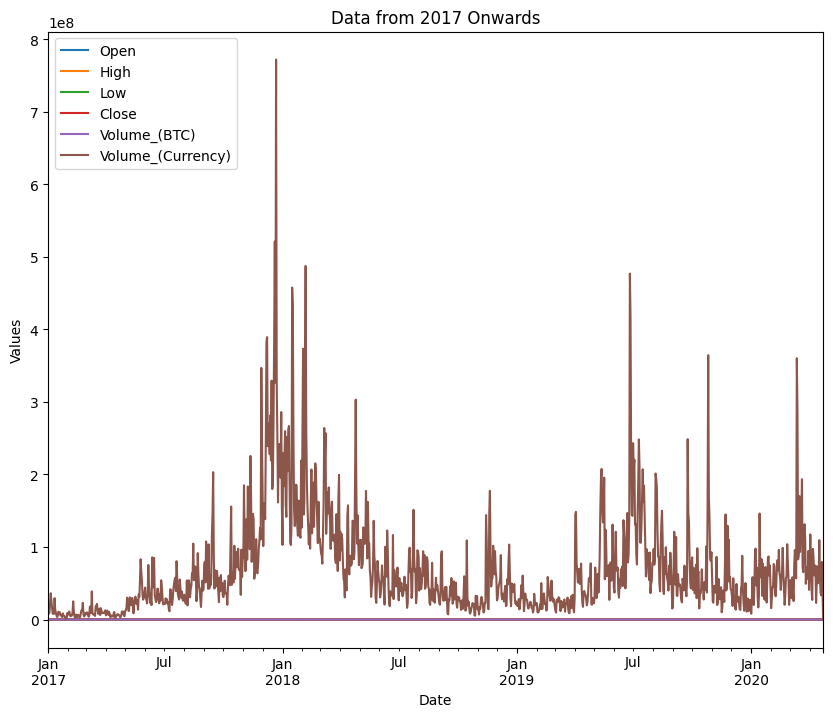

In [256]:
df = pd.read_csv("/content/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv")

from datetime import date
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Remove the Weighted_Price column
df.drop(columns=['Weighted_Price'], inplace=True)

# Rename Timestamp to Date
df.rename(columns={'Timestamp': 'Date'}, inplace=True)

# Convert the timestamp values to date values
df['Date'] = pd.to_datetime(df['Date'], unit='s')

# Set Date as index
df.set_index('Date', inplace=True)

# Fill missing Close values with the previous row's value
df['Close'].fillna(method='ffill', inplace=True)

# Fill missing High, Low, Open values with the same row's Close value
df['High'].fillna(df['Close'], inplace=True)
df['Low'].fillna(df['Close'], inplace=True)
df['Open'].fillna(df['Close'], inplace=True)

# Fill missing Volume_(BTC) and Volume_(Currency) with 0
df['Volume_(BTC)'].fillna(0, inplace=True)
df['Volume_(Currency)'].fillna(0, inplace=True)

# Filter data from 2017 onwards
df = df[df.index >= '2017-01-01']

# Resample the data to daily intervals and aggregate
df_daily = df.resample('D').agg({
    'High': 'max',
    'Low': 'min',
    'Open': 'mean',
    'Close': 'mean',
    'Volume_(BTC)': 'sum',
    'Volume_(Currency)': 'sum'
})

# Plotting
df_daily.plot(y=['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)'],
              figsize=(10, 8)),
plt.title('Data from 2017 Onwards'),
plt.xlabel('Date'),
plt.ylabel('Values'),
plt.legend(loc='upper left'),
plt.show()
